Define and plot the graph for the exercise.

[('A', 'B', {'weight': 1}), ('A', 'C', {'weight': 4}), ('A', 'D', {'weight': 4}), ('B', 'E', {'weight': 5}), ('C', 'B', {'weight': 2}), ('C', 'F', {'weight': 6}), ('C', 'G', {'weight': 3}), ('D', 'F', {'weight': 3}), ('E', 'G', {'weight': 5}), ('E', 'I', {'weight': 2}), ('F', 'H', {'weight': 2}), ('G', 'I', {'weight': 4}), ('H', 'I', {'weight': 6})]


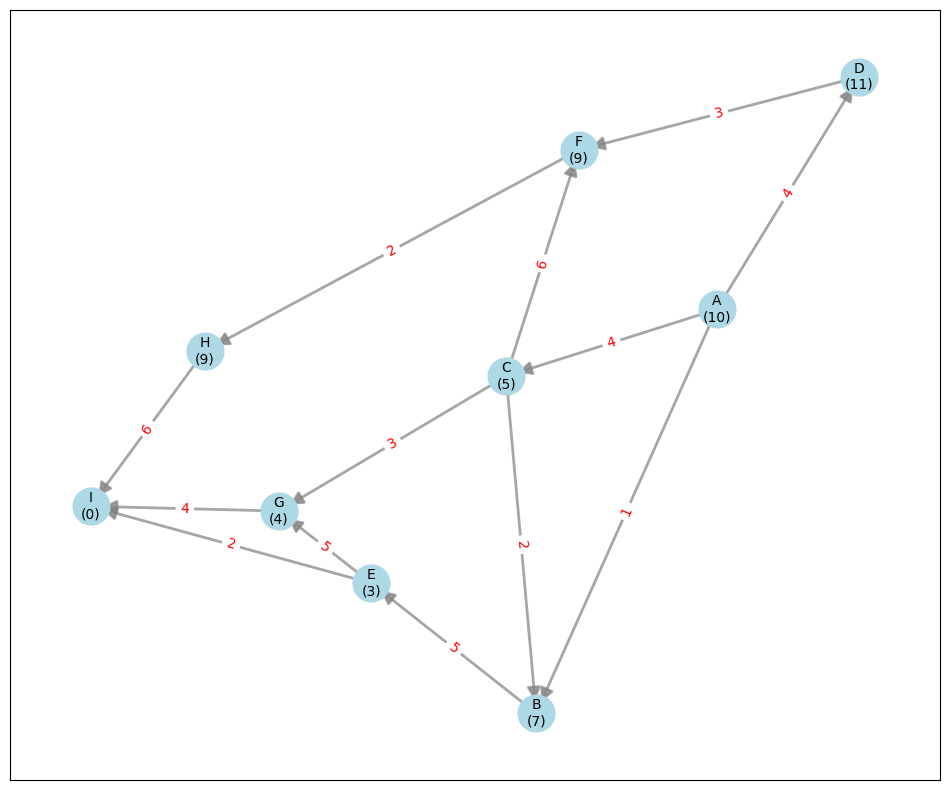

In [6]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import heapq

# Define adjacency matrix
adj_matrix = np.array([
    [0, 1, 4, 4, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 5, 0, 0, 0, 0],
    [0, 2, 0, 0, 0, 6, 3, 0, 0],
    [0, 0, 0, 0, 0, 3, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 5, 0, 2],
    [0, 0, 0, 0, 0, 0, 0, 2, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 4],
    [0, 0, 0, 0, 0, 0, 0, 0, 6],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
])

# Node labels
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

# Heuristic values
heuristics = {
    'A': 10,
    'B': 7,
    'C': 5,
    'D': 11,
    'E': 3,
    'F': 9,
    'G': 4,
    'H': 9,
    'I': 0
}

# Create directed graph
G = nx.DiGraph()

# Add edges based on adjacency matrix
for i, from_node in enumerate(nodes):
    for j, to_node in enumerate(nodes):
        if i != j and adj_matrix[i, j] > 0:
            G.add_edge(from_node, to_node, weight=adj_matrix[i, j])



print(G.edges(data=True))

seed = 997 

# Plot the graph
pos = nx.spring_layout(G, seed=seed)  # Set seed for reproducible layout
edge_labels = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(12, 10))

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=2, alpha=0.7, edge_color='gray', arrows=True, arrowsize=20)
nx.draw_networkx_labels(G, pos, labels={node: f'{node}\n({heuristics[node]})' for node in G.nodes()}, font_size=10, font_family='sans-serif')

# Draw edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')


plt.show()


Greedy Best First search and A* search

In [7]:
def greedy_best_first_search(G, start, goal, heuristics):
    """Greedy Best-First Search with total cost calculation"""
    open_list = [(heuristics[start], start)]
    came_from = {start: None}
    path_cost = {start: 0}
    nodes_explored = 0

    while open_list:
        _, current = heapq.heappop(open_list)
        nodes_explored += 1

        if current == goal:
            path = []
            total_cost = 0
            while current is not None:
                path.append(current)
                if came_from[current] is not None:
                    total_cost += G[came_from[current]][current]['weight']
                current = came_from[current]
            path.reverse()
            return path, nodes_explored, total_cost

        for neighbor in G.neighbors(current):
            if neighbor not in came_from:
                came_from[neighbor] = current
                path_cost[neighbor] = path_cost[current] + G[current][neighbor]['weight']
                heapq.heappush(open_list, (heuristics[neighbor], neighbor))

    return None, nodes_explored, float('inf')

def heuristic_function(node, goal, heuristics):
    """Heuristic function for A* search."""
    return heuristics[node]

def a_star_search(G, start, goal, heuristics):
    """Perform A* search."""
    try:
        path = nx.astar_path(G, source=start, target=goal, weight='weight', heuristic=lambda u, v: heuristic_function(u, goal, heuristics))
        total_cost = sum(G[u][v]['weight'] for u, v in zip(path[:-1], path[1:]))
        return path, len(path), total_cost
    except nx.NetworkXNoPath:
        return None, 0, float('inf')  # If no path is found

In [8]:
start_node = 'A'
goal_node = 'I'

# Perform searches
gbfs_path, gbfs_nodes_explored, gbfs_total_cost = greedy_best_first_search(G, start_node, goal_node, heuristics)
astar_path, astar_nodes_explored, astar_total_cost = a_star_search(G, start_node, goal_node, heuristics)

# Print results
print(f"Greedy Best-First Search Path: {gbfs_path}")
print(f"Nodes Explored: {gbfs_nodes_explored}")
print(f"Total Edge Cost of GBFS Path: {gbfs_total_cost}")

print(f"A* Search Path: {astar_path}")
print(f"Nodes Explored: {astar_nodes_explored}")
print(f"Total Edge Cost of A* Search Path: {astar_total_cost}")



Greedy Best-First Search Path: ['A', 'C', 'G', 'I']
Nodes Explored: 4
Total Edge Cost of GBFS Path: 11
A* Search Path: ['A', 'B', 'E', 'I']
Nodes Explored: 4
Total Edge Cost of A* Search Path: 8
